In [1]:
#Import libraries
import numpy as np
import pandas as pd

In [2]:
#View dataset
HousePrice = pd.read_csv("house_price.csv", delimiter = ',', header = 0)
print(HousePrice)

    area  rooms   price
0   2104      3  399900
1   1600      3  329900
2   2400      3  369000
3   1416      2  232000
4   3000      4  539900
5   1985      4  299900
6   1534      3  314900
7   1427      3  198999
8   1380      3  212000
9   1494      3  242500
10  1940      4  239999
11  2000      3  347000
12  1890      3  329999
13  4478      5  699900
14  1268      3  259900
15  2300      4  449900
16  1320      2  299900
17  1236      3  199900
18  2609      4  499998
19  3031      4  599000
20  1767      3  252900
21  1888      2  255000
22  1604      3  242900
23  1962      4  259900
24  3890      3  573900
25  1100      3  249900
26  1458      3  464500
27  2526      3  469000
28  2200      3  475000
29  2637      3  299900
30  1839      2  349900
31  1000      1  169900
32  2040      4  314900
33  3137      3  579900
34  1811      4  285900
35  1437      3  249900
36  1239      3  229900
37  2132      4  345000
38  4215      4  549000
39  2162      4  287000
40  1664      2 

# Single Regression 

In [3]:
#Apply Single linear regression to detect outliers 
#Yield 2 formulae, detect outliers for area/price and for rooms/price
# Y = b01 + b1x1
# Y = b02 + b2x2
# Y: predicted dependent variable: price
# ymean: mean of dependent variable
# b01, b02: intercept of dependent variable: ymean - (b1*x1mean), ymean - (b2*x2mean)
# b1, b2: gradient of independent variables: area, rooms
# x1, x2: variables substituted, x1mean, x2mean of area and rooms
size = len(HousePrice['area'])
x1 = HousePrice['area']
x2 = HousePrice['rooms']
y = HousePrice['price']
x1mean = sum(HousePrice['area'])/size 
x2mean = sum(HousePrice['rooms'])/size
ymean = sum(HousePrice['price'])/size

print("size of data: ", size)
print("X1 MEAN: ", x1mean)
print("X2 MEAN: ", x2mean)
print("Y MEAN: ", ymean)

size of data:  47
X1 MEAN:  2000.6808510638298
X2 MEAN:  3.1702127659574466
Y MEAN:  340412.6595744681


In [4]:
#First formula
# xx1total, xx2total: Sum of squared of area, rooms
# xy1total, xy2total: Sum of area*price, rooms*price
# slope1, slope2: equivalent to b1, b2
xx1total = 0
xy1total = 0
for i in range(size):
    x1diff = (x1[i] - x1mean)**2
    #print("x:", x1diff)
    xx1total = xx1total + x1diff
    y1diff = (x1[i] - x1mean) * (y[i] - ymean)
    #print("y:", ydiff)
    xy1total = xy1total + y1diff

#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)
print("SSx1: ", "{0: .3f}".format(xx1total), '\n')
print("SPxy1: ", "{0: .3f}".format(xy1total), '\n')

slope1 = xy1total / xx1total
print("Slope1 : ", "{0: .3f}".format(slope1), '\n')
intercept = ymean - (slope1 * x1mean)
print("Intercept: ", intercept, '\n')
print("y = ", slope1,"x1 + ", intercept, '\n')

SSx1:   29051384.213 

SPxy1:   3908145819.894 

Slope1 :   134.525 

Intercept:  71270.49244872906 

y =  134.52528772024135 x1 +  71270.49244872906 



In [5]:
#Find predicted values and residuals
#Plot to find outliers, repeat for second formula then compare output with multiregression 
# predicted1, predicted2: calculate predicted values
# residual1, residual2: predicted1, predicted2 - actual  
predicted1 = []
residual1 = []

for p in range(size):
    #predicted = slope * (x1[p]) + intercept
    predicted1.append((slope1 * x1[p]) + intercept)
    residual1.append(predicted1[p] - y[p])
    #print("x1, area:", x1[p]," price, y:", y[p], "predicted price:", "{0: .2f}".format(predicted1[p]), 
          #"residual:", "{0: .2f}".format(residual1[p]))


In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

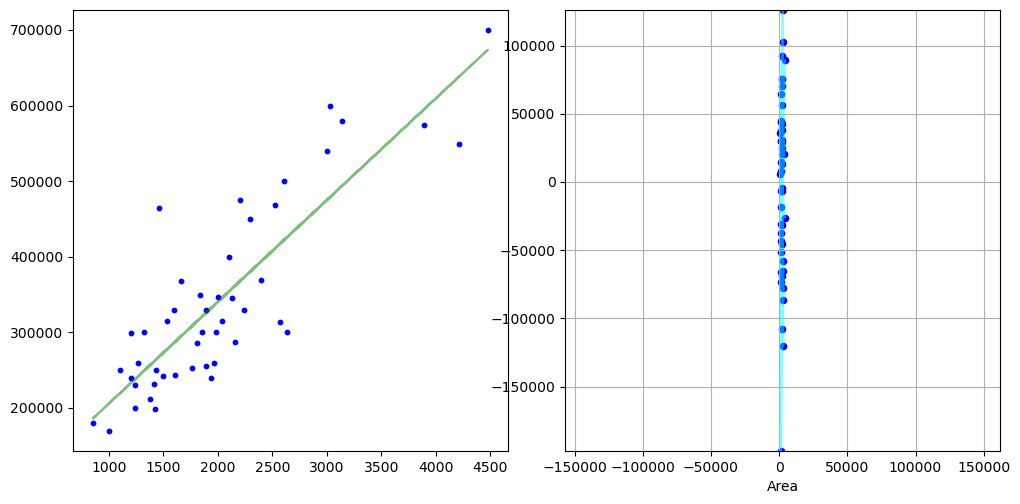

[-0.71056159 -0.67628293  0.39170692  0.46382743 -1.01395795  0.5985709
 -0.58087287  1.00126172  0.70007325  0.46371789  1.43786224 -0.10410111
 -0.06976067 -0.40875988 -0.28135862 -1.07891778 -0.7957858   0.58673388
 -1.21186564 -1.87011939  0.87403852  1.09501691  0.68812877  1.17380461
  0.32223293 -0.47775226 -3.07196675 -0.90274813 -1.67981636  1.96566949
 -0.48688302  0.5594892   0.48009629 -1.35015908  0.45194255  0.22886158
  0.12542953  0.20384644  1.39178904  1.17076614 -1.1437277   0.66146079
  1.5991256  -1.0333712   0.09330131  0.31969956 -0.09968474]


In [7]:
#fig, ax = plt.subplots(2, 2, figsize=(10,7))

figure, axis = plt.subplots(1, 2,  figsize=(10,5))
figure.tight_layout()
#plt.figure(1, 1, figsize=(5, 5))
axis[0].scatter(x1, y, color = "blue", alpha = 1, s = 10)
axis[0].plot(x1, predicted1, color = "green", alpha = 0.5)
plt.xlabel("Area")
#plt.ylabel("Price")
axis[1].scatter(x1, residual1,  color = "blue", alpha = 1, s = 20)
axis[1].plot(x1, residual1,  color = "cyan", alpha = 0.5)
axis[1].margins(x = 0, y = 0)
#plt.xlim(0, 5)
#plt.ylim(0, 100)
#plt.xlabel("Area")
#plt.ylabel("Residual")
plt.grid()
plt.axis('equal')
plt.show()
standardisedresidual1 = residual1 / np.std(residual1)
print(standardisedresidual1)

In [8]:
#Second Formula
xx2total = 0
xy2total = 0
for j in range(size):
    x2diff = (x2[i] - x2mean)**2
    #print("x:", x2diff)
    xx2total = xx2total + x2diff
    y2diff = (x2[i] - x2mean) * (y[i] - ymean)
    #print("y:", y2diff)
    xy2total = xy2total + y2diff

#Sumxx2 = np.sum(xdiff2, axis = 0, keepdims = True)
#Sumxy2 = np.sum(ydiff2, axis = 0, keepdims = True)
print("SSx2: ", "{0: .3f}".format(xx2total), '\n')
print("SPxy2: ", "{0: .3f}".format(xy2total), '\n')

slope2 = xy2total / xx2total
print("Slope2 : ", "{0: .3f}".format(slope2), '\n')
intercept2 = ymean - (slope2 * x2mean)
print("Intercept: ", intercept2, '\n')
print("y = ", slope2,"x2 + ", intercept2, '\n')

SSx2:   1.362 

SPxy2:   807301.277 

Slope2 :   592861.875 

Intercept:  -1539085.6250000047 

y =  592861.8750000015 x2 +  -1539085.6250000047 



In [9]:
predicted2 = []
residual2 = []

for q in range(size):
    #predicted2 = slope * (x2[q]) + intercept
    predicted2.append((slope2 * x2[q]) + intercept2)
    residual2.append(predicted2[q] - y[q])
    #print("x2, rooms:", x2[q]," price, y:", y[q], "predicted price:", "{0: .2f}".format(predicted2[q]), 
          #"residual:", "{0: .2f}".format(residual2[q]))

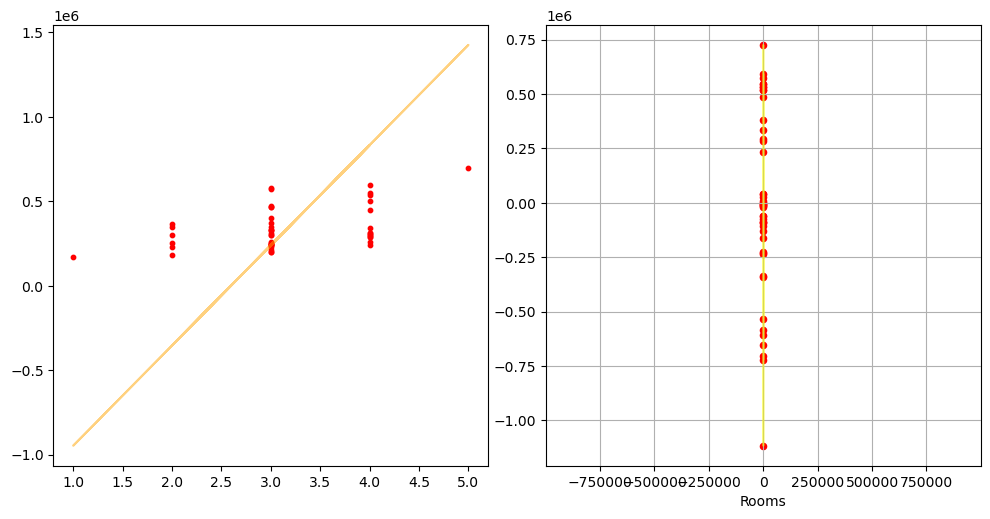

[-0.39406892 -0.2220937  -0.31815414 -1.43811047  0.71851705  1.30814635
 -0.18524187  0.0995024   0.06756169 -0.00737037  1.45531045 -0.26410479
 -0.22233693  1.78196723 -0.05011849  0.93962803 -1.60492643  0.09728883
  0.81654783  0.57332083 -0.03292097 -1.49461661 -0.00835308  1.4064179
 -0.82155016 -0.0255506  -0.55277747 -0.56383302 -0.57857375 -0.14839004
 -1.72776587 -2.74208028  1.27129452 -0.83629089  1.34254139 -0.0255506
  0.02358517  1.19734517  0.69616027  1.33983892 -1.77346214 -0.2220937
  1.27350563 -0.14617893 -1.31011178  1.30814635  0.        ]


In [12]:
figure2, axis2 = plt.subplots(1, 2,  figsize=(10,5))
figure2.tight_layout()
#plt.figure(1, 1, figsize=(5, 5))
axis2[0].scatter(x2, y, color = "red", alpha = 1, s = 10)
axis2[0].plot(x2, predicted2, color = "orange", alpha = 0.5)
plt.xlabel("Rooms")
#plt.ylabel("Price")
axis2[1].scatter(x2, residual2,  color = "red", alpha = 1, s = 20)
axis2[1].plot(x2, residual2,  color = "yellow", alpha = 0.5)
#axis[1].margins(x = 0, y = 0)
#plt.xlim(0, 5)
#plt.ylim(0, 100)
#plt.xlabel("Area")
#plt.ylabel("Residual")
plt.grid()
plt.axis('equal')
plt.show()
standardisedresidual2 = residual2 / np.std(residual2)
print(standardisedresidual2)

# Multiple Regression

In [13]:
slope1 = xy1total / xx1total
slope2 = xy2total / xx2total
print("Slope1 : ", "{0: .3f}".format(slope1), '\n')
print("Slope2 : ", "{0: .3f}".format(slope2), '\n')
intercept3 = ymean - (slope1 * x1mean) - (slope2 * x2mean)
print("Intercept: ", intercept3, '\n')
print("y = ", slope1,"x1 + ", slope2,"x2 + " ,intercept3, '\n')

Slope1 :   134.525 

Slope2 :   592861.875 

Intercept:  -1808227.7921257438 

y =  134.52528772024135 x1 +  592861.8750000015 x2 +  -1808227.7921257438 



In [14]:
predicted3 = []
residual3 = []
#residual = predicted - actual
for r in range(size):
    #predicted = slope * (x[p]) + intercept
    predicted3.append((slope1 * x1[r])+(slope2 * x2[r])+ intercept3)
    residual3.append(predicted3[r] - y[r])
    #print("area:", x1[r], " rooms:", x2[r]," y:", y[r], "predicted:", "{0: .2f}".format(predicted3[r]), 
          #"residual:", "{0: .2f}".format(residual3[r]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])


In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig
from mpl_toolkits import mplot3d

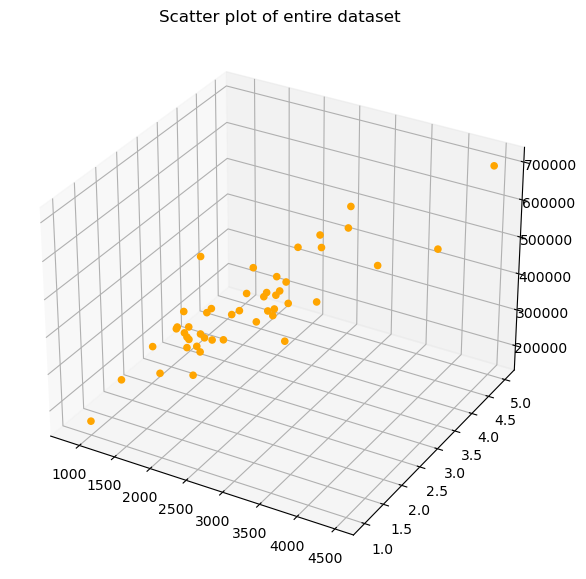

In [16]:
#Plot entire dataset
zzz = HousePrice['price']
xxx = HousePrice['area']
yyy = HousePrice['rooms']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(xxx, yyy, zzz, color = "orange", alpha = 1, s = 20)
#ax.scatter3D(x1, x2, predicted, color = "red", alpha = 0.5)
#ax.scatter3D(x1, x2, residual, color = "blue", alpha = 1, s = 5)
plt.title("Scatter plot of entire dataset")

#ax.scatter3D(xxx1, yyy1, New, color = "black", alpha = 1, s = 15)
#plt.title("Scatter plot of predicted dataset")
# show plot
plt.show()

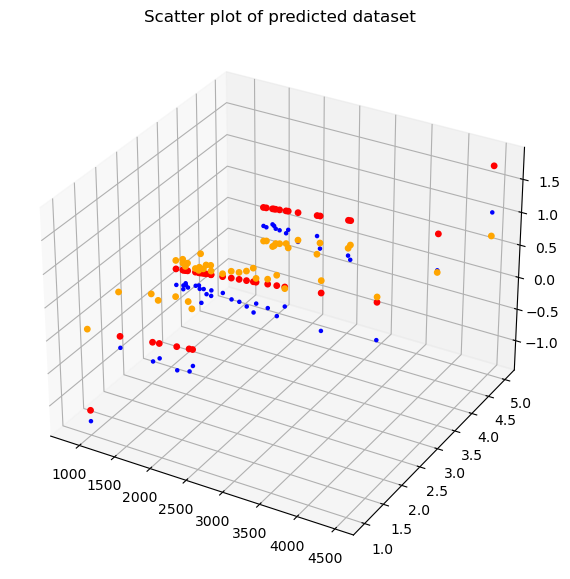

In [17]:
zzz = HousePrice['price']
xxx = HousePrice['area']
yyy = HousePrice['rooms']

xxx1 = [2567, 1200, 852, 1852, 1203] 
yyy1 = [5, 2, 5, 2, 3]
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(xxx, yyy, zzz, color = "orange", alpha = 1, s = 15)
ax.scatter3D(x1, x2, predicted3, color = "red", alpha = 1, s = 15)
ax.scatter3D(x1, x2, residual3, color = "blue", alpha = 1, s = 5)

#ax.scatter3D(xxx1, yyy1, New, color = "black", alpha = 1, s = 15)
plt.title("Scatter plot of predicted dataset")
# show plot
plt.show()

In [144]:
from sklearn import linear_model

In [152]:
#Predict using multiregression
X = HousePrice[['area', 'rooms']]
Y = HousePrice['price']

In [153]:
MultiReg = linear_model.LinearRegression()
MultiReg.fit(X, Y)

LinearRegression()

In [154]:
New = []
New.append(MultiReg.predict([[2567, 5]]))
New.append(MultiReg.predict([[1200, 2]]))
New.append(MultiReg.predict([[852, 5]]))
New.append(MultiReg.predict([[1852, 2]]))
New.append(MultiReg.predict([[1203, 3]]))

print(New, '\n')

[array([403261.6141844]), array([239174.68013929]), array([164515.30824418]), array([329940.03959878]), array([230854.29304902])] 



E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### For example, words such as young, tall, good, or high are fuzzy. There is no single quantitative value which defines the term young when describing a fuzzy concept (or fuzzy variable) such as age. For some people, age 25 is young, and for others, age 35 is young. The concept young has no clean boundary.

In [157]:
# Building the Multiple Linear Regression Model  
  
# Setting the independent and dependent features  
X = HousePrice.iloc[:, 1:].values  
y = HousePrice.iloc[:, 0].values  
  
  
# Initializing the model class from the sklearn package and fitting our data into it  
reg = linear_model.LinearRegression()  
reg.fit(X, y)  
  
# Printing the intercept and the coefficients of the regression equation  
print('Intercept: ', reg.intercept_)  
print('Coefficients array: ', reg.coef_)  
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = HousePrice[['area', 'rooms']].values.reshape(-1,2)  
dependent = HousePrice['price']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = reg.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = reg.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Area', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Bedrooms', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Prices', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k') 

Intercept:  -381.2028922925115
Coefficients array:  [2.36071434e+02 4.79854971e-03]


ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.